/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


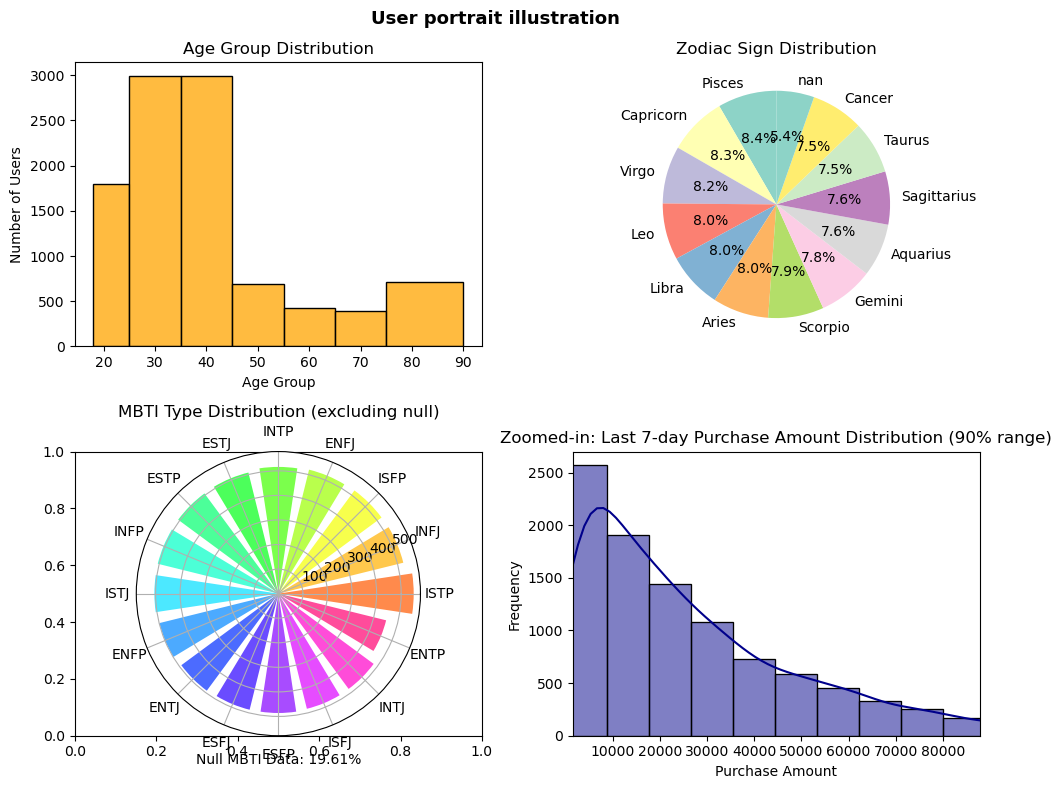

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Read CSV files to dataframe
df = pd.read_csv('user_data.csv')

# panel for 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Set the overall figure title
fig.suptitle('User portrait illustration', fontsize=13, weight='bold')

# Text content
# explanation_text = "The attributes shown in the illustration are for demonstration purposes only. In actual reports, these will be replaced by labels that carry meaningful business insights."
# Use the textwrap module to wrap the text
# wrapped_text = "\n".join(textwrap.wrap(explanation_text, width=80))
# Add wrapped text below the title (adjust y position based on the title's location)
# fig.text(0.5, 0.88, wrapped_text, ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.86])

# ---- chart 1: Age distribution (histplot)---- #
# inferred age
age_bins = [18, 25, 35, 45, 55, 65, 75, 90]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-90']
df['Age Group'] = pd.cut(df['Predicted Age'], bins=age_bins, labels=age_labels, right=False)

# distribution 
sns.histplot(df['Predicted Age'], bins=age_bins, kde=False, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Age Group Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Number of Users')

# ---- Chart: distribution of Zodiac ---- #
zodiac_counts = df['Predicted Zodiac Sign'].value_counts(dropna=False)
axes[0, 1].pie(zodiac_counts, labels=zodiac_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(zodiac_counts)))
axes[0, 1].set_title('Zodiac Sign Distribution')

# ---- chart3: distribution of MBTI ---- #
# 
mbti_counts = df['Predicted MBTI'].dropna().value_counts()
angles = np.linspace(0, 2 * np.pi, len(mbti_counts), endpoint=False).tolist()  # 计算角度
values = mbti_counts.values  

# Rose
ax3 = plt.subplot(223, polar=True)
ax3.bar(angles, values, color=sns.color_palette("hsv", len(mbti_counts)), alpha=0.7, width=0.3)
ax3.set_xticks(angles)
ax3.set_xticklabels(mbti_counts.index)
ax3.set_title("MBTI Type Distribution (excluding null)")

# process null values
null_percentage = df['Predicted MBTI'].isna().mean() * 100
ax3.text(0.5, -0.1, f'Null MBTI Data: {null_percentage:.2f}%', transform=ax3.transAxes, ha='center')

# get the boundary of 5% and 95%
lower_bound = np.percentile(df['Last 7-day Cat1 Purchase Amount'], 5)
upper_bound = np.percentile(df['Last 7-day Cat1 Purchase Amount'], 95)

# ---- chart4: sales distribution over the past 7 days ---- #
sns.histplot(df['Last 7-day Cat1 Purchase Amount'], bins=30, kde=True, ax=axes[1, 1], color='darkblue')
axes[1, 1].set_title('Zoomed-in: Last 7-day Purchase Amount Distribution (90% range)')
axes[1, 1].set_xlabel('Purchase Amount')
axes[1, 1].set_ylabel('Frequency')

# limit the area to 90% on the x-axis
axes[1, 1].set_xlim(lower_bound, upper_bound)


# Set layout to adjust spacing between subplots and text
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leaves space for title and text

plt.tight_layout()
plt.show()

